In [1]:
from sklearn.cluster import KMeans  #K-Means를 위한 도구
from sklearn.datasets import make_blobs

from matplotlib import pyplot as plt  # 그래프를 그리기 위한 도구

In [2]:
x, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

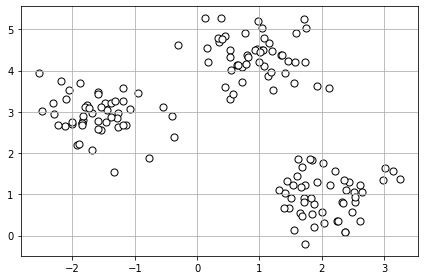

In [3]:
plt.scatter(x[:,0], x[:,1], c='white', marker='o', edgecolors='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol = 1e-04, random_state=0)
pred = kmeans.fit_predict(x)

In [5]:
kmeans_plus = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=0)
kmeans_plus.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

왜곡: 72.48


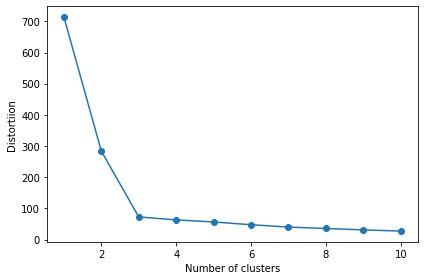

In [6]:
print('왜곡: %.2f' %kmeans_plus.inertia_)

distortions = []

for i in range(1,11):
  kmeans_plus = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
  kmeans_plus.fit(x)
  distortions.append(kmeans_plus.inertia_)

plt.plot(range(1,11), distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortiion')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np

np.random.seed(12)
variables = ['x', 'y', 'z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

x = np.random.random_sample([5,3])*10
df = pd.DataFrame(x, columns=variables, index=labels)
df

,x,y,z
ID_0,1.541628,7.400497,2.633150
ID_1,5.337394,0.145750,9.187470
ID_2,9.007149,0.334214,9.569493
ID_3,1.372093,2.838284,6.060832
ID_4,9.442251,8.527355,0.022592


In [8]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,10.488008,12.400774,5.708900,8.396706
ID_1,10.488008,0.000000,3.694396,5.722693,13.080373
ID_2,12.400774,3.694396,0.000000,8.767847,12.588097
ID_3,5.708900,5.722693,8.767847,0.000000,11.573821
ID_4,8.396706,13.080373,12.588097,11.573821,0.000000


In [9]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df, method='complete', metric='euclidean')

row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [10]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'item no'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,item no
cluster 1,1.0,2.0,3.694396,2.0
cluster 2,0.0,3.0,5.708900,2.0
cluster 3,4.0,6.0,11.573821,3.0
cluster 4,5.0,7.0,13.080373,5.0


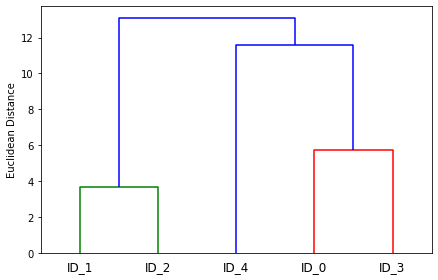

In [11]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendrogram = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
lables = ac.fit_predict(x)
print('클러스터 레이블: %s' %lables)

클러스터 레이블: [0 1 1 0 2]


In [14]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
lables = ac.fit_predict(x)
print('클러스터 레이블: %s' %lables)

클러스터 레이블: [0 1 1 0 0]
